# **[다층 퍼셉트론] XOR 문제 해결**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 단층 퍼셉트론으로는 XOR 문제 해결 불가능
## 중간에 은닉층이 존재하는 다층 퍼셉트론으로 해결 가능
## 활성화 함수는 선형이 아닌 비선형이어야 한다.
## 선형 함수를 은닉층으로 사용할 경우 은닉층이 여러개 있는 것과 하나 있는 것과 차이가 없다.
## 시그모이드 함수는 기울기 소실 문제 때문에 은닉층에서 거의 사용되지 않는다.
## ReLU 혹은 Leaky ReLU가 은닉층에서 주로 사용된다.
## 시그모이드 함수는 이진 분류에서 출력층에, 소프트맥스 함수는 다중 클래스 분류에서 출력층에 사용한다.


In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# GPU 사용 가능하면 사용. 아니면 CPU 사용.
device = "cuda" if torch.cuda.is_available() else "cpu"
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([
    [0, 0], [0, 1], [1, 0], [1, 1]
]).to(device)
Y = torch.FloatTensor([
    [0], [1], [1], [0]
]).to(device)

model = nn.Sequential(
    nn.Linear(2, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),
    nn.Sigmoid()
).to(device)
criterion = torch.nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 10000
for i in range(1, epochs+1):
  optimizer.zero_grad()

  hypothesis = model(X)
  cost = criterion(hypothesis, Y)

  cost.backward()
  optimizer.step()

  if i%1000==0:
    print(f'{i}번 반복. cost : {cost.item()}')
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())


1000번 반복. cost : 0.6931380033493042
2000번 반복. cost : 0.6931172013282776
3000번 반복. cost : 0.6930763721466064
4000번 반복. cost : 0.6929106712341309
5000번 반복. cost : 0.6822028160095215
6000번 반복. cost : 0.0013045670930296183
7000번 반복. cost : 0.0004839746979996562
8000번 반복. cost : 0.00028911171830259264
9000번 반복. cost : 0.00020385674724821
10000번 반복. cost : 0.00015653259470127523
모델의 출력값(Hypothesis):  [[1.1171837e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8539323e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


8730
10000
Accuracy: 0.8729999661445618
Label:  5
Prediction:  3


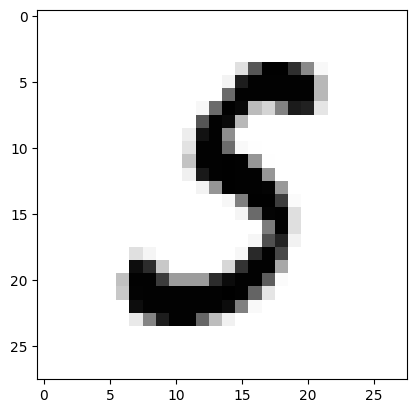

# **[다층 퍼셉트론] XOR 문제 해결**

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# GPU 사용 가능하면 사용. 아니면 CPU 사용.
device = "cuda" if torch.cuda.is_available() else "cpu"
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([
    [0, 0], [0, 1], [1, 0], [1, 1]
]).to(device)
Y = torch.FloatTensor([
    [0], [1], [1], [0]
]).to(device)

model = nn.Sequential(
    nn.Linear(2, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),
    nn.Sigmoid()
).to(device)
criterion = torch.nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 10000
for i in range(1, epochs+1):
  optimizer.zero_grad()

  hypothesis = model(X)
  cost = criterion(hypothesis, Y)

  cost.backward()
  optimizer.step()

  if i%1000==0:
    print(f'{i}번 반복. cost : {cost.item()}')
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())


1000번 반복. cost : 0.6931380033493042
2000번 반복. cost : 0.6931172013282776
3000번 반복. cost : 0.6930763721466064
4000번 반복. cost : 0.6929106712341309
5000번 반복. cost : 0.6822028160095215
6000번 반복. cost : 0.0013045670930296183
7000번 반복. cost : 0.0004839746979996562
8000번 반복. cost : 0.00028911171830259264
9000번 반복. cost : 0.00020385674724821
10000번 반복. cost : 0.00015653259470127523
모델의 출력값(Hypothesis):  [[1.1171837e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8539323e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


8730
10000
Accuracy: 0.8729999661445618
Label:  5
Prediction:  3


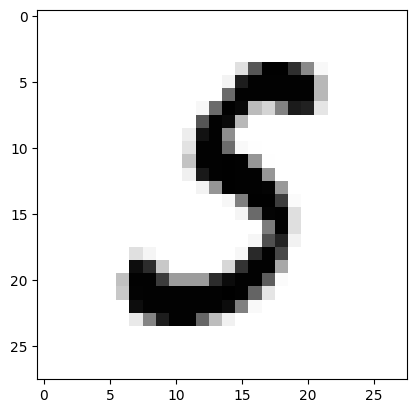

# **[다층 퍼셉트론] 손글씨 분류**

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
10번 반복. cost : 2.123866081237793
20번 반복. cost : 1.8034603595733643
30번 반복. cost : 1.4691944122314453
40번 반복. cost : 1.1532104015350342
50번 반복. cost : 0.8516111969947815
60번 반복. cost : 0.5998753309249878
70번 반복. cost : 0.4288587272167206
80번 반복. cost : 0.31957191228866577
90번 반복. cost : 0.25078606605529785
100번 반복. cost : 0.20608742535114288
평균 비용 : 0.20608742535114288


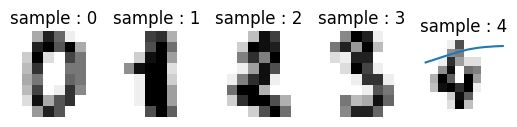

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import torch
import torch.nn as nn
from torch import optim
digits=load_digits()
# digits.image : 8x8 행렬. 하나의 이미지.
# digits.target : 레이블
# zip : 두 리스트의 같은 인덱스에 있는 값들을 서로 묶어줌
# subplot : 여러 개의 그래프를 하나의 그림으로 나타냄
# 이미지 시각화
images_and_labels = list(zip(digits.images, digits.target))
for idx, (image, label) in enumerate(images_and_labels[:5]):
  plt.subplot(1, 5, idx+1)
  plt.axis('off') # 축 안보이게
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') # colormap 설정. interpolation은 보간법. nearest가 고해상도
  plt.title('sample : %i' % label)

X = digits.data
print(X)
Y = digits.target

model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters()) # sgd + momentum, RMSprop
losses=[]

epochs=100
for epoch in range(1, epochs+1):
  optimizer.zero_grad()
  pred = model(X) # forward
  loss = loss_fn(pred, Y)
  loss.backward()
  optimizer.step()
  if epoch%10==0:
    print(f'{epoch}번 반복. cost : {loss.item()}')
    losses.append(loss.item())

print(f'평균 비용 : {loss.mean()}')
plt.axis()


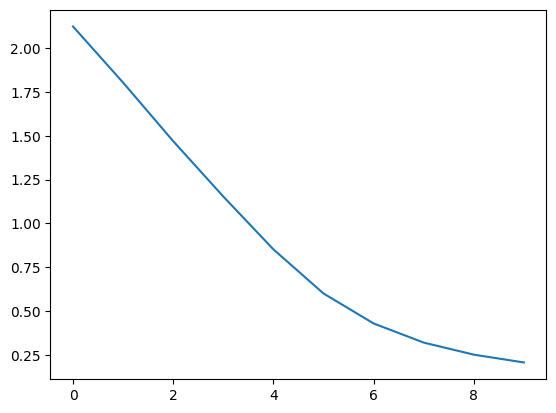

In [ ]:
plt.plot(losses)

# **[다층 퍼셉트론] MNIST 분류**

### 배치 사이즈는 2의 제곱
### 과적합 피하는 방법
1. 데이터 양을 늘린다.
2. 모델의 복잡도를 줄인다.
3. 가중치 규제를 적용한다.
4. 드롭아웃 : 신경망 일부 사용 x

### 기울기 소실을 막는 방법
1. 은닉층의 활성화 함수로 ReLU나 ReLU 변형 함수 사용
2. 가중치 초기화
3. 배치 정규화

1번 반복. cost : 2.299739360809326
101번 반복. cost : 0.15845146775245667
201번 반복. cost : 0.34514662623405457
301번 반복. cost : 0.1685289442539215
401번 반복. cost : 0.2493571937084198
501번 반복. cost : 0.3333817422389984
601번 반복. cost : 0.16740289330482483
701번 반복. cost : 0.10308266431093216
801번 반복. cost : 0.1967923641204834
901번 반복. cost : 0.1296558827161789
정확도 : 94.48999786376953


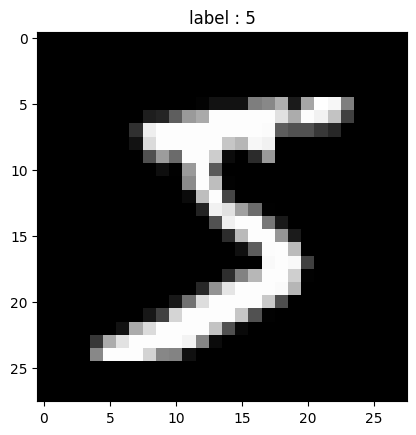

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from torch import optim

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)
X = mnist.data /255
y = mnist.target

plt.title(f'label : {y[0]}')
plt.imshow(X[0].reshape(28, 28), cmap='gray')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)

y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)
print(ds_train)
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(epoch):
  model.train() # 학습 모드 전환. 드롭아웃, 정규화, 역전파, 파라미터 갱신 등등...

  for idx, (data, target) in enumerate(loader_train):
    optimizer.zero_grad()
    prediction = model(data)

    loss = loss_fn(prediction, target.type(torch.long))
    loss.backward()
    optimizer.step()
    if idx%100==0:
      print(f'{idx+1}번 반복. cost : {loss.item()}')

def test():
  model.eval()
  correct=0

  with torch.no_grad():
    for data, target in loader_test:
      output = model(data)

      _, predicted = torch.max(output.data, 1)
      correct += predicted.eq(target.data.view_as(predicted)).sum()
  print(f'정확도 : {100 * (correct/len(loader_test.dataset))}')
train(10)
test()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cd /content/drive/MyDrive/ColabNotebooks/deep-learning
!git config --global user.email 'growth_s@naver.com'
!git config --global user.name 'ezcolin2'
!git add *
!git commit -m '로지스틱 회귀, 소프트맥스 회귀'
!git push


Mounted at /content/drive


NameError: ignored